The dataset contains 768 records spread over 9 columns, each representing different health indicators that could potentially impact diabetes diagnosis.

Here's a detailed overview of its contents:

Pregnancies: The number of pregnancies the patient has had.
Glucose: Concentration of plasma glucose measured after two hours in an oral glucose tolerance test.
Blood Pressure: The diastolic blood pressure of the patient, measured in mm Hg.
Skin Thickness: The thickness of the tricep skinfold, measured in millimeters.
Insulin: Level of 2-hour serum insulin, measured in mu U/ml.
BMI: Body mass index, calculated as weight in kilograms divided by the square of height in meters.
Diabetes Pedigree Function: A function that scores the likelihood of diabetes based on family history.
Age: The age of the patient, in years.
Outcome: A binary variable (0 or 1), where 1 denotes the presence of diabetes and 0 denotes its absence.

# Dataset Analysis:
Exploring the dataset's configuration, assessing for any missing entries, and providing a summary of its key attributes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

#Load Diabetes dataset 
dataset = "diabetes-2-1.csv"
diabetes_dataset = pd.read_csv(dataset)

#Display the first few rows of the dataset to understand its structurization 
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Get the shape of the diabetes dataset in terms of rows and columns
diabetes_dataset.shape

(768, 9)

In [3]:
# Display the data types of each column in the diabetes dataset
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
# Generate descriptive statistics summarizing the central tendency, dispersion, and shape of the dataset's distribution
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Replacing the missing values

In [5]:
# This function displays general information about the diabetes_dataset, including column names, data types, and non-null value counts.
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Replace zeros with NaN in specified columns to handle missing values more accurately.
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_dataset[columns_with_zeros]=diabetes_dataset[columns_with_zeros].replace(0, np.nan)

In [7]:
# Reference to the dataset containing information about diabetes patients.
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


# Missing values after replacement with NAN

In [8]:
diabetes_dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Visualizations of the Dataset

### 1.Boxplots

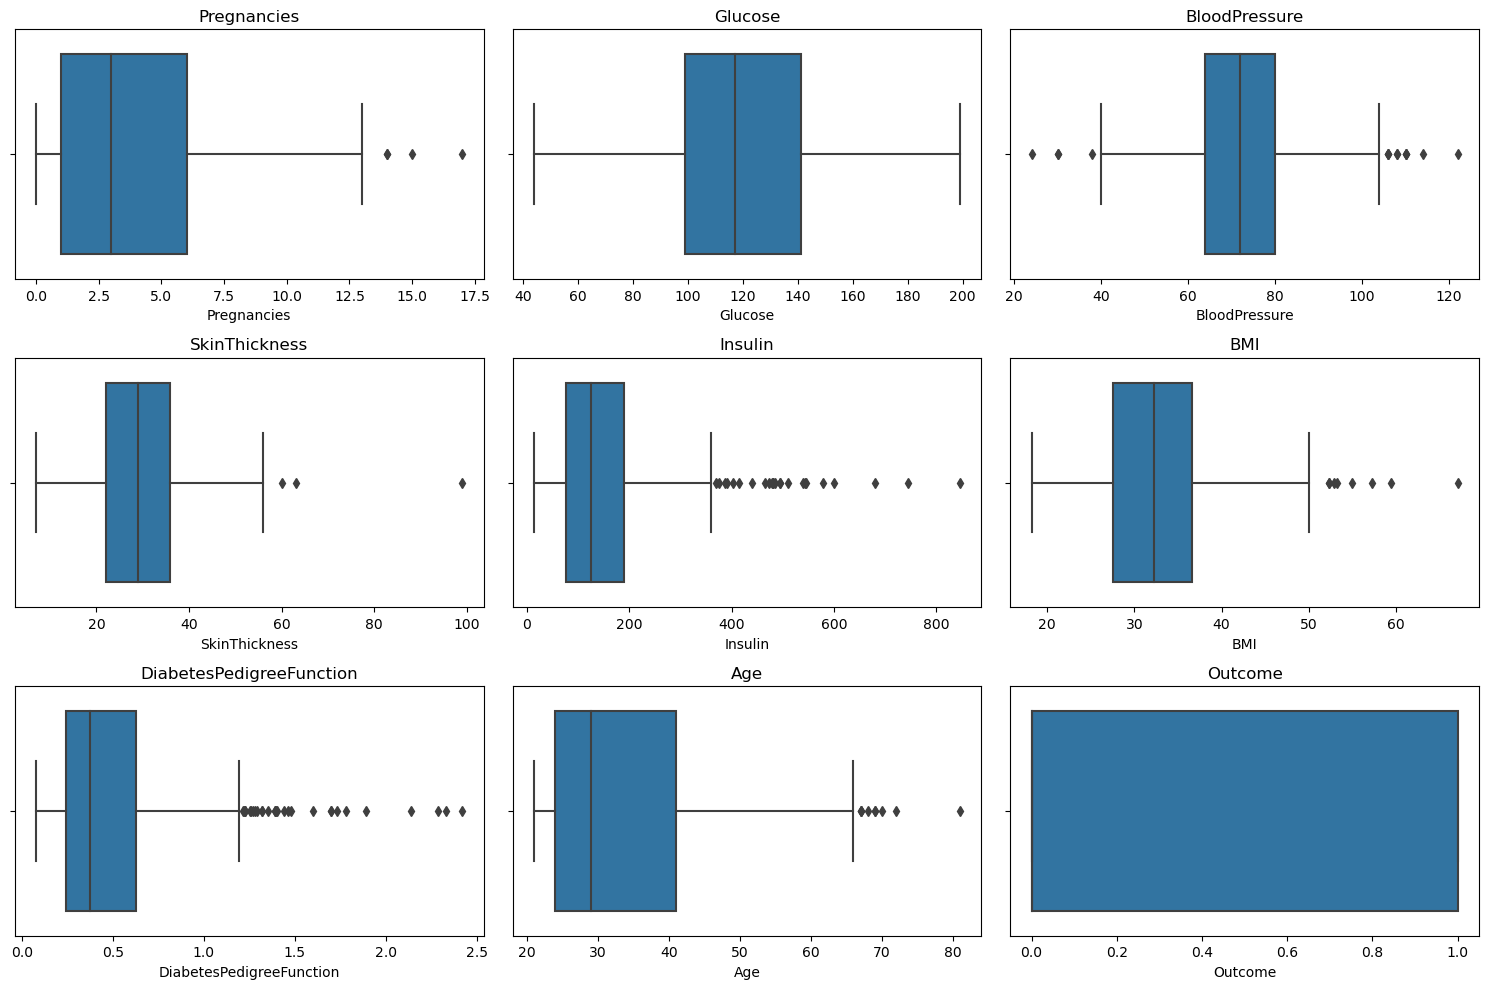

In [9]:
# Define the figure size and grid layout upfront
plt.figure(figsize=(15, 10))

# Get only numeric columns, excluding 'Outcome' if it's not needed for box plots
numeric_columns = diabetes_dataset.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns to create box plots
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot position
    sns.boxplot(x=diabetes_dataset[column])
    plt.title(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 2.Correlation Heatmap

This heatmap will assist in identifying linear associations between the variables. Notable positive or negative correlations between the features and the target variable ('Outcome') could highlight key predictors of diabetes.

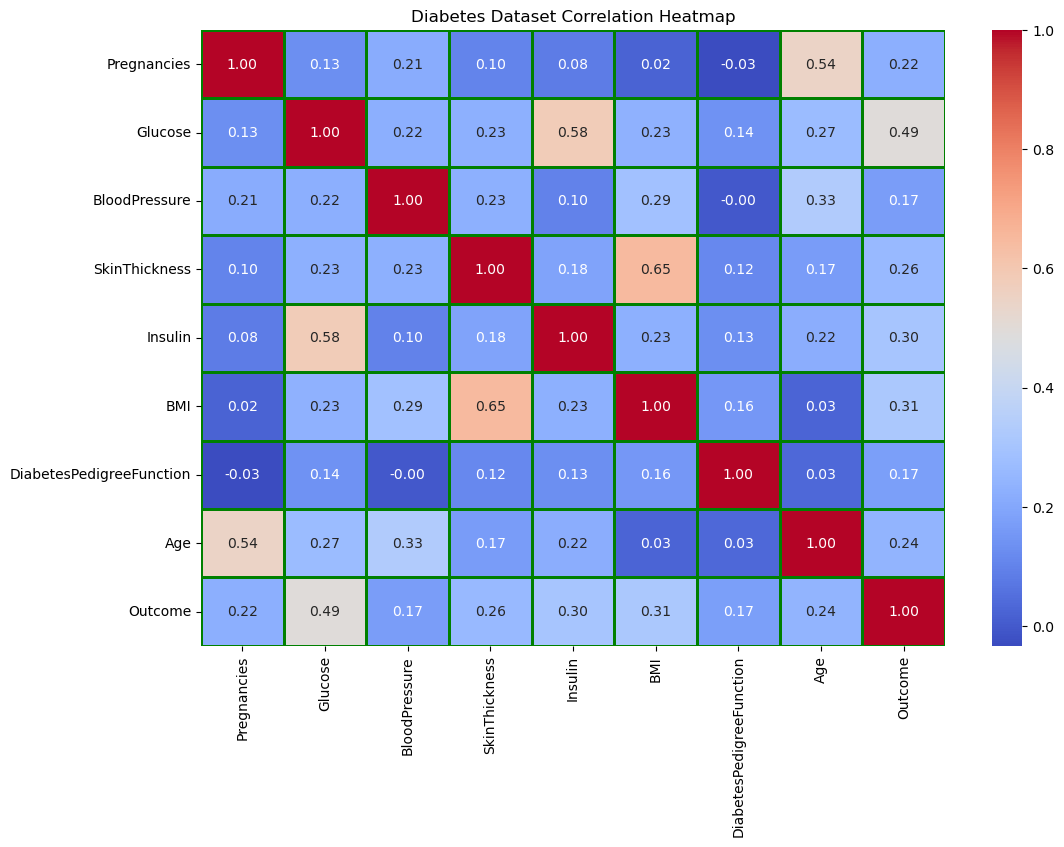

In [10]:
#Building a correlation matrix
correlation_matrix = diabetes_dataset.corr()

#Displaying the correlation matrix through a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=2, linecolor="green")
plt.title("Diabetes Dataset Correlation Heatmap")
plt.show()

# 3.Distributions of individual variables

These procedures will enable you to analyze the distribution of each variable independently, which is essential for detecting patterns, outliers, and possible issues with data quality.

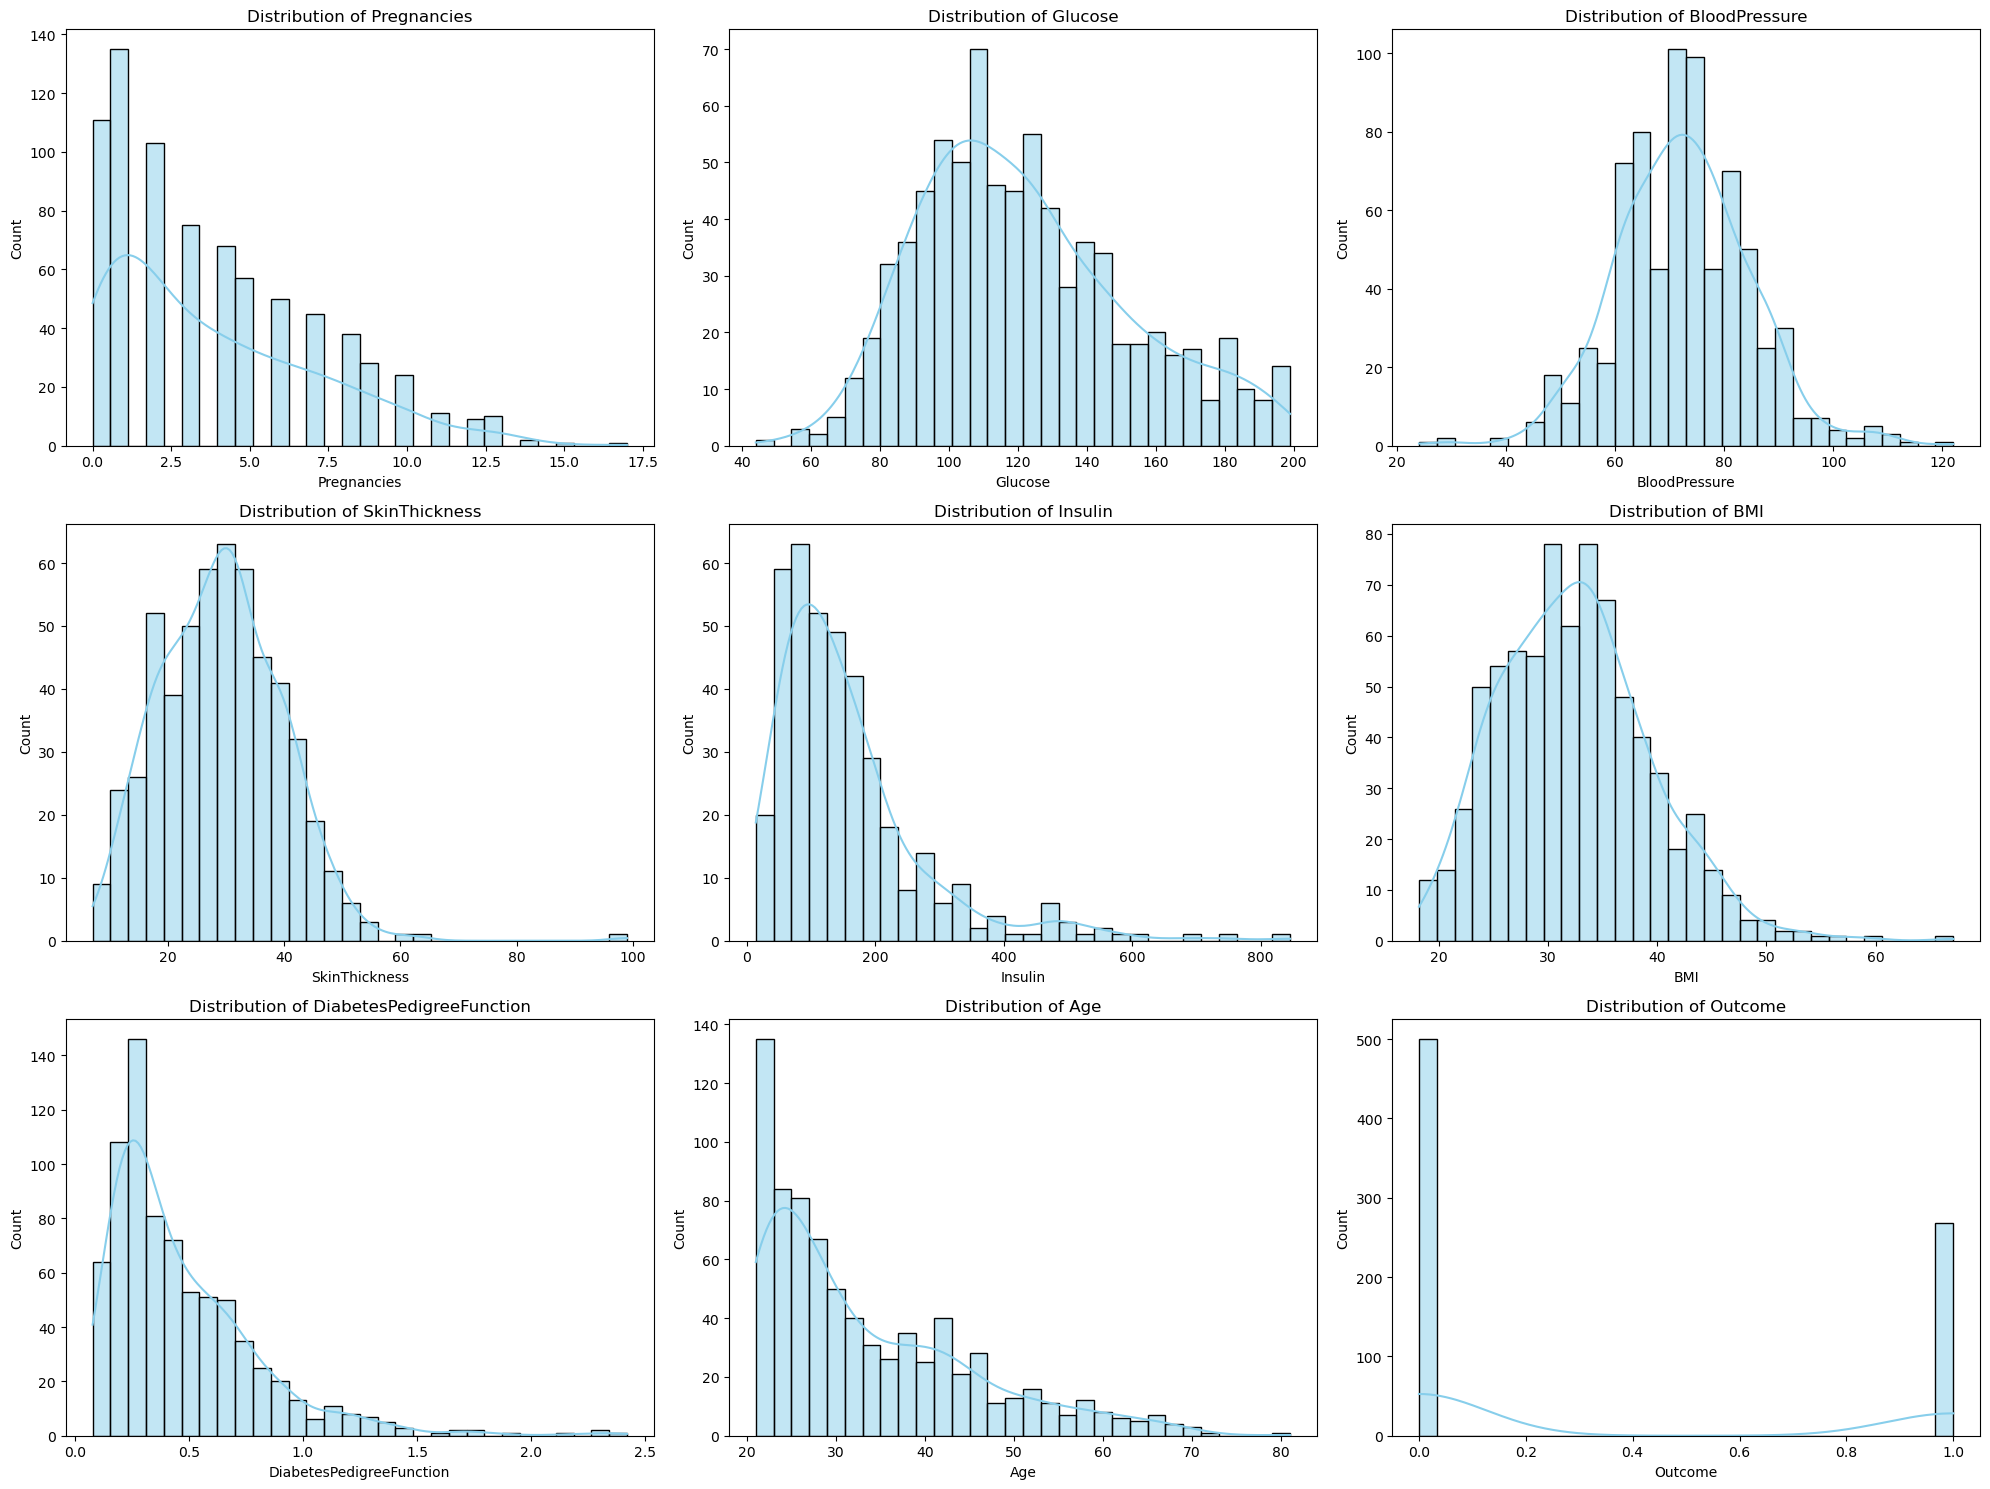

In [11]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Define the overall size of the figure
plt.figure(figsize=(20, 15))

# Generate subplots for each feature in the dataset
for i, column in enumerate(diabetes_dataset.columns):
    # Initialize a subplot for each variable
    plt.subplot(3, 3, i+1)
    
    # Create a histogram for each feature
    sns.histplot(data=diabetes_dataset, x=column, kde=True, color='skyblue', bins=30, edgecolor='black')
    
    # Assign a title to each subplot
    plt.title(f'Distribution of {column}')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

# 4.Comparative Analysis of Diabetic and Non-Diabetic Individuals
Below are visual representations comparing diabetic and non-diabetic individuals across various health metrics such as "Pregnancies," "Glucose," "BloodPressure," "SkinThickness," "Insulin," "BMI," "DiabetesPedigreeFunction," and "Age." In these visualizations:

Individuals with diabetes are depicted in red, while those without diabetes are shown in blue.

Each graph illustrates the density distributions for both groups, enabling an analysis of how each variable's values vary between those diagnosed with diabetes and those not. For instance, variations in glucose levels, BMI, and age can be observed, potentially revealing trends associated with the occurrence of diabetes.


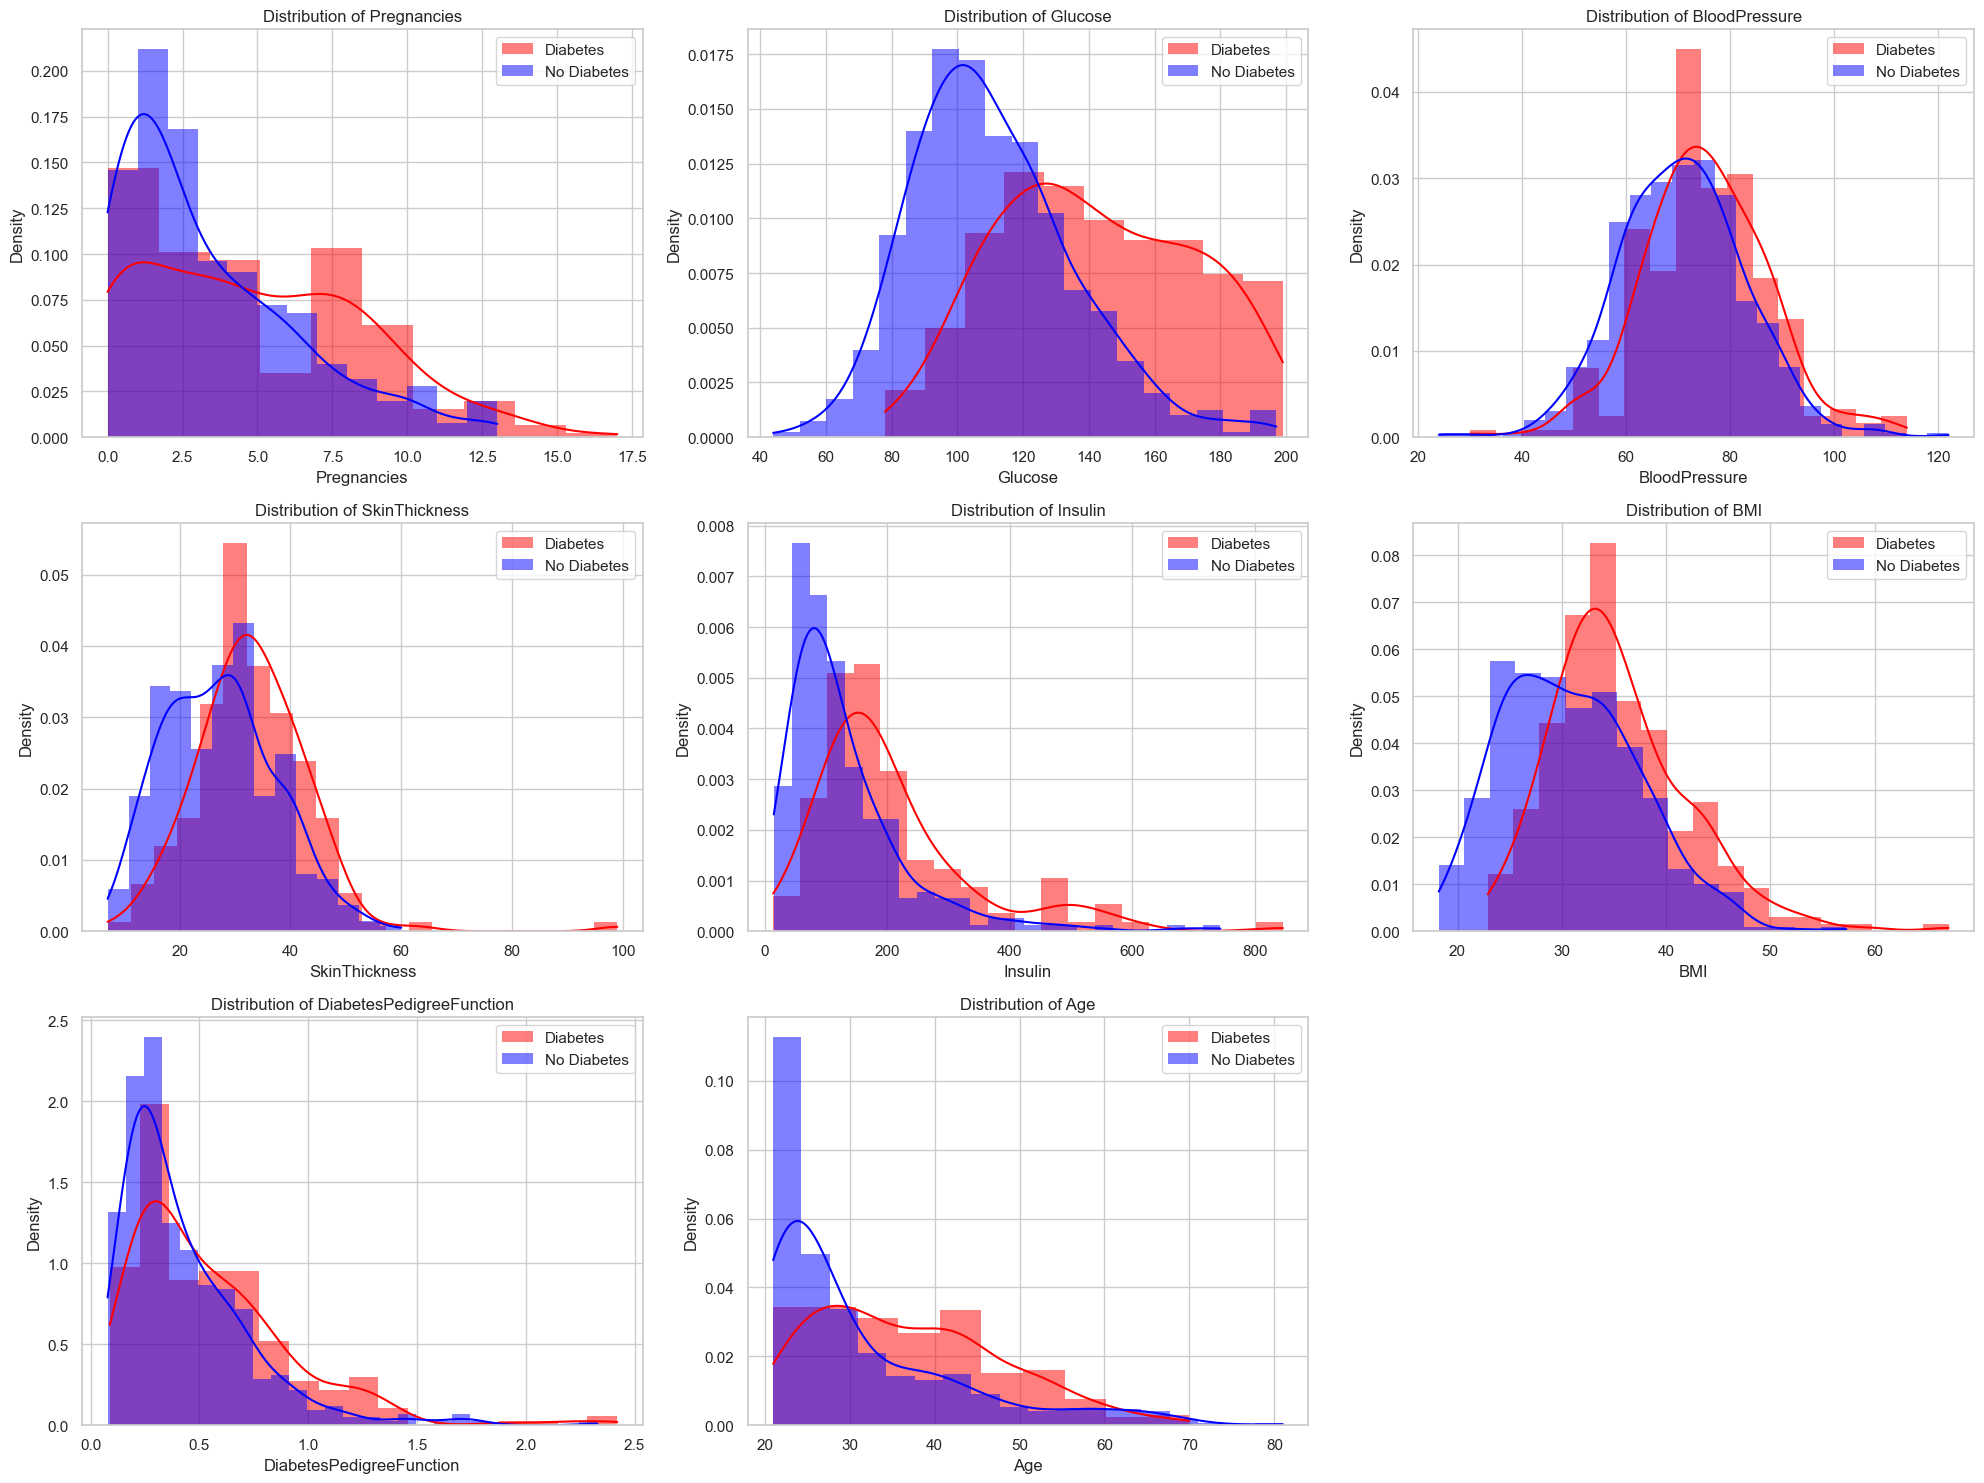

In [12]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Prepare data
diabetes_pos = diabetes_dataset[diabetes_dataset['Outcome'] == 1]
diabetes_neg = diabetes_dataset[diabetes_dataset['Outcome'] == 0]

# Initialize the figure
plt.figure(figsize=(20, 15))

# List of columns for comparison
columns_to_compare = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create plots for each column
for index, column in enumerate(columns_to_compare, start=1):
    plt.subplot(3, 3, index)
    sns.histplot(data=diabetes_pos, x=column, color="red", label="Diabetes", kde=True, stat="density", linewidth=0)
    sns.histplot(data=diabetes_neg, x=column, color="blue", label="No Diabetes", kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# 5. Pair Plot

/Users/umutates/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


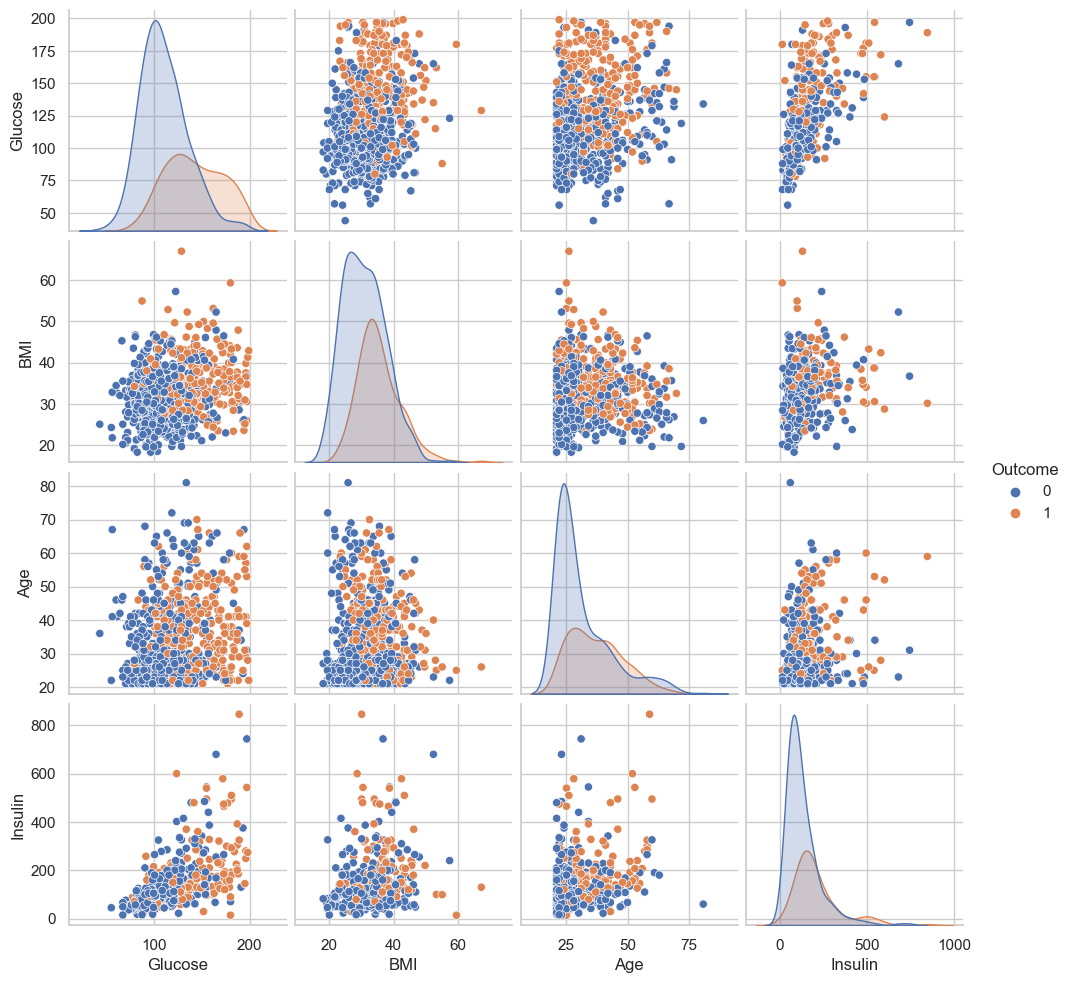

In [13]:
#sns.pairplot(diabetes_dataset)
# Choosing a subset of the dataset that includes variables highly correlated with 'Outcome'
# As an example, the variables selected are 'Glucose', 'BMI', 'Age', and 'Insulin' along with 'Outcome'
subset_data = diabetes_dataset[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']]

# Employing seaborn's pairplot to explore the interrelationships among these selected variables
sns.pairplot(subset_data, hue='Outcome')
plt.show()

# Data Processing
Setting up the data for modeling, which involves addressing any missing values, encoding categorical variables where necessary, and implementing feature scaling.

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes_dataset.fillna(diabetes_dataset.mean(), inplace=True)

In [15]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [16]:
#Counting missing values in each column of the diabetes dataset
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
#Feature Scaling Preparation
X_new = diabetes_dataset.drop("Outcome", axis=1)
y_new = diabetes_dataset["Outcome"]

In [18]:
from scipy import stats

# Assuming df is your DataFrame
z_scores = np.abs(stats.zscore(diabetes_dataset.select_dtypes(include=['float64', 'int64'])))
filtered_entries = (z_scores < 3).all(axis=1)
diabetes_dataset_clean = diabetes_dataset[filtered_entries]

In [19]:
diabetes_dataset_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [20]:
# Splitting the dataset into training and test sets with a stratified approach
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, stratify=y_new, random_state=42)

In [21]:
# Applying StandardScaler for feature scaling
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

X_train_scaled_new.shape, X_test_scaled_new.shape

((614, 8), (154, 8))

# Model Selection and Training:
We will evaluate various models—including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Support Vector Machine—to identify the most effective one for this classification challenge.

In [22]:
#Importing each model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
#Initialize instances of each model, optionally setting a random_state for consistent results across multiple runs:
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

# Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score,precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Handling zero values by replacing them with the mean of the column
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    diabetes_dataset[col].replace(0, diabetes_dataset[col].mean(), inplace=True)

# Splitting the dataset into features and target variable
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred_log = model.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
report = classification_report(y_test, y_pred_log)


print (f"accuracy:",accuracy)
print (f"confusion matrix:\n",conf_matrix)
print (f"classification report:\n ",report)

accuracy: 0.7532467532467533
confusion matrix:
 [[82 17]
 [21 34]]
classification report:
                precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [25]:
# Extracting true negatives, false positives, false negatives, and true positives from the confusion matrix
tn_log, fp_log, fn_log, tp_log = conf_matrix.ravel()

# Calculating Sensitivity (also known as True Positive Rate or Recall for the positive class)
sensitivity = tp_log / (tp_log + fn_log)

# Calculating Specificity (also known as True Negative Rate)
specificity = tn_log / (tn_log + fp_log)

print("Sensitivity (Recall for the positive class):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (Recall for the positive class): 0.6181818181818182
Specificity (True Negative Rate): 0.8282828282828283


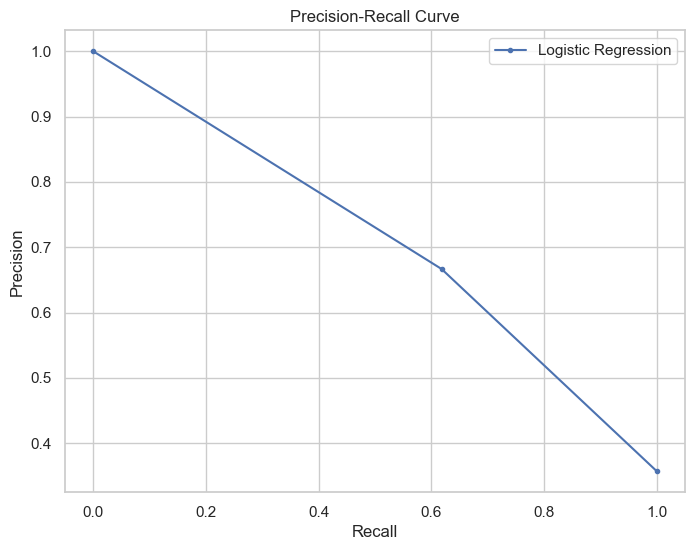

In [26]:
#Let's plot a precision-recall curve using logistic regression model
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_log)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Random Forest

In [27]:
# Initialize and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", report_rf)

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[80 19]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [28]:
# Extracting true negatives, false positives, false negatives, and true positives from the confusion matrix
tn_rf, fp_rf, fn_rf, tp_rf = conf_matrix_rf.ravel()

# Calculating Sensitivity (True Positive Rate)
sensitivity_rf = tp_rf / (tp_rf + fn_rf)

# Calculating Specificity (True Negative Rate)
specificity_rf = tn_rf / (tn_rf + fp_rf)

print("Sensitivity (True Positive Rate):", sensitivity_rf)
print("Specificity (True Negative Rate):", specificity_rf)


Sensitivity (True Positive Rate): 0.6545454545454545
Specificity (True Negative Rate): 0.8080808080808081


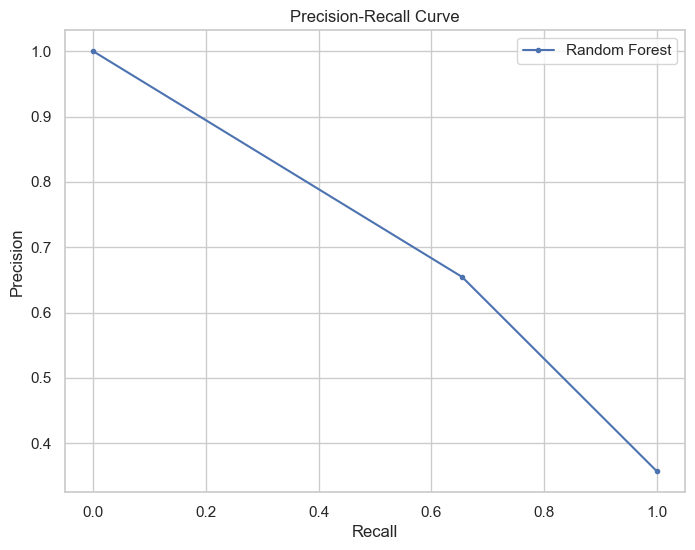

In [29]:
#Let's plot a precision-recall curve using random forest model
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Desicion Tree

In [30]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred_dt = decision_tree_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", report_dt)

Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [31]:
# Extracting true negatives, false positives, false negatives, and true positives from the confusion matrix
tn_dt, fp_dt, fn_dt, tp_dt = conf_matrix_dt.ravel()

# Calculating Sensitivity (True Positive Rate)
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculating Specificity (True Negative Rate)
specificity_dt = tn_dt / (tn_dt + fp_dt)

print("Sensitivity (True Positive Rate):", sensitivity_dt)
print("Specificity (True Negative Rate):", specificity_dt)

Sensitivity (True Positive Rate): 0.6181818181818182
Specificity (True Negative Rate): 0.7777777777777778


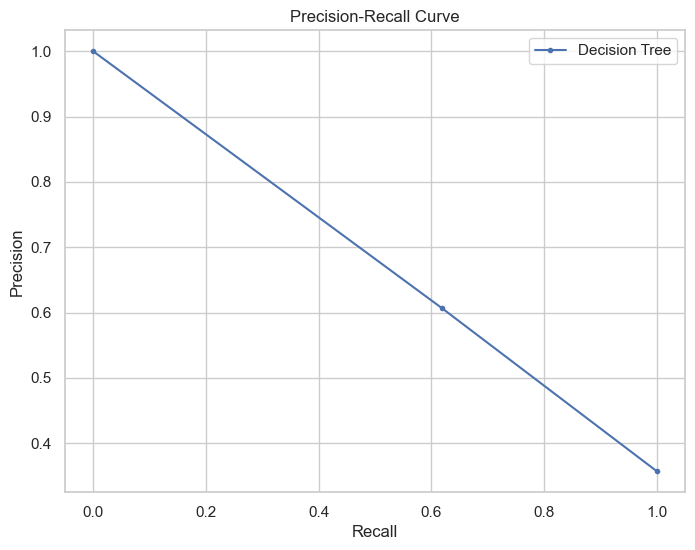

In [32]:
#Let's plot a precision-recall curve using decision model model
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_dt)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# KNN

In [33]:
# Initialize and train the K-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", report_knn)

Accuracy: 0.7467532467532467
Confusion Matrix:
 [[74 25]
 [14 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154



In [34]:
# Extracting true negatives, false positives, false negatives, and true positives from the confusion matrix
tn_knn, fp_knn, fn_knn, tp_knn = conf_matrix_knn.ravel()

# Calculating Sensitivity (True Positive Rate)
sensitivity_knn = tp_knn / (tp_knn + fn_knn)

# Calculating Specificity (True Negative Rate)
specificity_knn = tn_knn / (tn_knn + fp_knn)

print("Sensitivity (True Positive Rate):", sensitivity_knn)
print("Specificity (True Negative Rate):", specificity_knn)

Sensitivity (True Positive Rate): 0.7454545454545455
Specificity (True Negative Rate): 0.7474747474747475


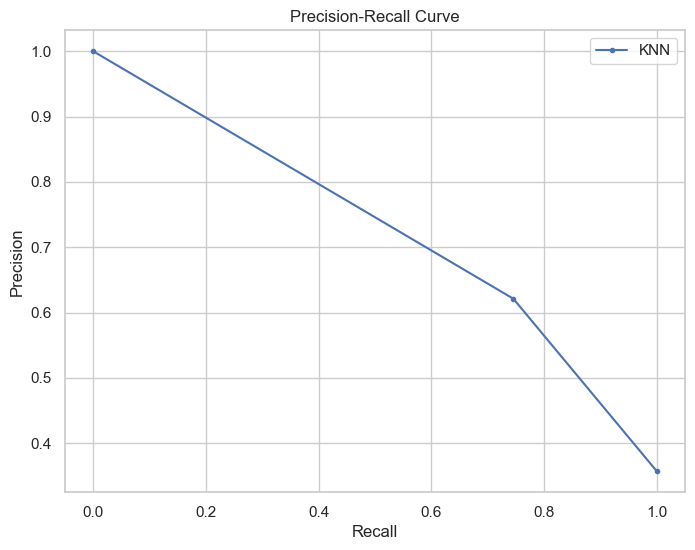

In [35]:
#Let's plot a precision-recall curve using KNN model
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# SVM

In [36]:
# Initialize and train the K-NN model
svm_model =SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", report_svm)

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[84 15]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [37]:
# Extract true negatives, false positives, false negatives, and true positives
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()

# Calculate Sensitivity and Specificity
sensitivity = tp_svm / (tp_svm + fn_svm)
specificity = tn_svm/ (tn_svm + fp_svm)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.5818181818181818
Specificity (True Negative Rate): 0.8484848484848485


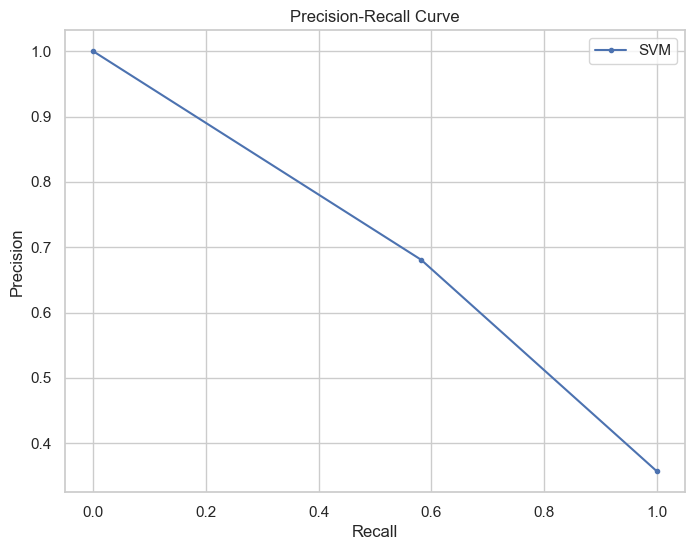

In [38]:
#Let's plot a precision-recall curve using SVM model

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Models Comparison

In [39]:
import pandas as pd

# Model metrics data as obtained from previous evaluations
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-NN', 'SVM', 'Random Forest'],
    'Accuracy': [0.7662, 0.7273, 0.7532, 0.7532, 0.7662],
    'Sensitivity': [0.6182, 0.6545, 0.6182, 0.7455, 0.7455],
    'Specificity': [0.8283, 0.8081, 0.7778, 0.7475, 0.7475]}

# Creating a DataFrame
results_dataset= pd.DataFrame(data)

# Display the DataFrame
results_dataset

,Model,Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.7662,0.6182,0.8283
1,Decision Tree,0.7273,0.6545,0.8081
2,K-NN,0.7532,0.6182,0.7778
3,SVM,0.7532,0.7455,0.7475
4,Random Forest,0.7662,0.7455,0.7475


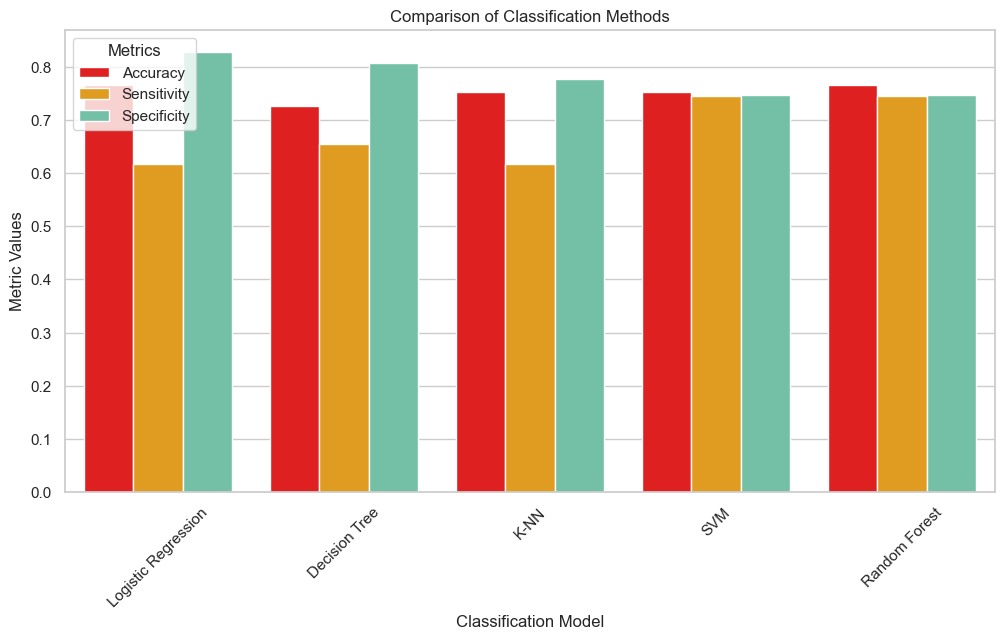

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model metrics data as obtained from previous evaluations
models_summary = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-NN', 'SVM', 'Random Forest'],
    'Accuracy': [0.7662, 0.7273, 0.7532, 0.7532, 0.7662],
    'Sensitivity': [0.6182, 0.6545, 0.6182, 0.7455, 0.7455],
    'Specificity': [0.8283, 0.8081, 0.7778, 0.7475, 0.7475]}

df = pd.DataFrame(models_summary)

#Convert the DataFrame to long format
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Value")

#Let's create a bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette=["#FF0000", "#FFA500", '#66CDAA'])
plt.title('Comparison of Classification Methods')
plt.xlabel('Classification Model')
plt.ylabel('Metric Values')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.show()